In [7]:
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import pandas as pd

#här plottas med olika värden på massor

def read_tsv(file_path):
    df = pd.read_csv(file_path,  # Replace with your file name
                    sep='\t',          # Tab separator for TSV files
                    skiprows=11,       # Skip the first 10 rows
                    names=['index', 'time', 'x', 'y', 'z'])  # Set new column names

    # Display the first few rows to verify
    z = df['z'].to_numpy()
    t = df['time'].to_numpy()
    x = df["x"].to_numpy()
    return t,z,x

def read_tsv2(file_path):
    df = pd.read_csv(file_path,  # Replace with your file name
                    sep='\t',          # Tab separator for TSV files
                    skiprows=11,       # Skip the first 10 rows
                    names=['index', 'time', 'x1', 'y1', 'z1', 'x2', 'y2', 'z2'])  # Set new column names

    # Display the first few rows to verify
    
    t = df['time'].to_numpy()
    x1 = df["x1"].to_numpy()
    x2 = df["x2"].to_numpy()
    
    return t, x1, x2

def fft(data, fs):
    window = np.hanning(len(data))
    windowed_data = data*window
    fft_values = np.fft.fft(windowed_data)
    #window = np.hanning(len(data))
    #windowed_data = data * window

    # Utför Fouriertransformen
    #fft_values = np.fft.fft(windowed_data)
    frequencies = np.fft.fftfreq(len(data), d=1/fs)

    # Hämta endast positiva frekvenser (speglingen)
    positive_freq_indices = np.where(frequencies > 0.3)
    frequencies = frequencies[positive_freq_indices]
    fft_magnitude = np.abs(fft_values[positive_freq_indices])
    return frequencies, fft_magnitude

def max_f(f, a):
    max_index = np.argmax(a)
    return f[max_index]

def filter(t, z, t1, t2):
    t3 = np.where((t >= t1) & (t <= t2))[0]
    return t[t3], z[t3]

def max_2(f, a):
    peaks, _ = find_peaks(a)
    
    # Check if there are at least two peaks
    if len(peaks) < 2:
        raise ValueError("Array does not contain at least two local maxima.")
    
    # Get the values at the peaks and sort to find the indices of the top two
    top_two_indices = peaks[np.argsort(a[peaks])[-2:]]
    f_max = f[top_two_indices]
    # Return sorted indices of the two largest peaks
    return f_max

def maxA(a):
    peaks, _ = find_peaks(a)
    top_two_peaks = peaks[np.argsort(a[peaks])[-2:]]
    max2 = a[top_two_peaks]
    return max2


def real_amplitude(amplitudes, N):
    
    # Hamming window correction factor (RMS)
    #hamming_correction = 0.54
    hamming_correction = 1
    
    # Correct the amplitude
    corrected_amplitudes = (2.0 * amplitudes / N) / hamming_correction
    
    return corrected_amplitudes

In [8]:

def plot_2_1(file_path, tn, tu, m, L):
    fig, axs = plt.subplots(2, 2, figsize=(12, 5))
    t, x1, x2 = read_tsv2(file_path)
    x1v = x1 - x1[0]
    x2v = x2 - x2[0]
    t1 = t.copy()
    t, x1v= filter(t, x1v, tn, tu)
    t2, x2v= filter(t1, x2v, tn, tu)
    theta1 = np.arcsin(x1v/L)
    theta2 = np.arcsin(x2v/L)
    f1, a1 = fft(theta1, 100)
    f2, a2 = fft(theta2, 100)

    A1 = real_amplitude(a1, len(a1))
    A2 = real_amplitude(a2, len(a2))
    
    print(x1[0])
    print(x2[0])
    print("Dominerande frekvenser v1 {}".format(max_2(f1, A1)))
    print("Dominerande frekvenser v2 {}".format(max_2(f2, A2)))
    print("Dominerande amplituder {}".format(maxA(A1)))
    print("Dominerande amplituder {}".format(maxA(A2)))

    axs[0,0].plot(t, theta1) 
    axs[0,0].plot(t2, theta2, color="orange")
    axs[0,0].set_ylim(-0.2, 0.2)
    axs[0, 0].set_yticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2]) 
    axs[0,1].plot(f1, A1)
    axs[0,1].set_xlim(0, 3) 
    axs[1,0].plot(t2, theta2)
    axs[1,0].set_ylim(-0.2, 0.2) 
    axs[1, 0].set_yticks([-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2])
    axs[1,1].plot(f2, A2)
    axs[1,1].set_xlim(0, 3) 
    


In [9]:
    
def plot_2_2(file_path, tn, tu, m, L):
    fig, axs = plt.subplots(2, 2, figsize=(12, 5))
    t, x1, x2 = read_tsv2(file_path)
    x1v = x1 - x1[0]
    x2v = x2 - x2[0]
    t1 = t.copy()
    t, x1v= filter(t, x1v, tn, tu)
    t2, x2v= filter(t1, x2v, tn, tu)
    theta1 = np.arcsin(x1v/L)
    theta2 = np.arcsin(x2v/L)
    f1, a1 = fft(theta1, 100)
    f2, a2 = fft(theta2, 100)

    A1 = real_amplitude(a1, len(a1))
    A2 = real_amplitude(a2, len(a2))
    
    
    print("Dominerande frekvenser v1 {}".format(max_2(f1, A2)))
    print("Dominerande frekvenser v2 {}".format(max_2(f2, A2)))
    print("Dominerande amplituder {}".format(maxA(A1)))


    axs[0,0].plot(t, theta1, label=r"$\theta_1$")
    axs[0,0].set_xlabel('Tid (s)', fontsize="18")
    axs[0,0].set_ylabel('Pendelns Vinkel (rad)', fontsize="14")
    axs[0,0].legend(loc='upper right')
    axs[0,0].set_title("Pendelns Position Över tid", fontsize="18")
    
    # Andra plotten: Frekvens vs Amplitud (Theta1)
    axs[0,1].plot(f1, A1, label=r"$\theta_1$")
    axs[0,1].set_xlabel('Frekvens (Hz)', fontsize="18")
    axs[0,1].set_ylabel('Amplitud', fontsize="18")
    axs[0,1].legend(loc='upper right')
    axs[0,1].set_title("Amplitud vs Frekvens", fontsize="18")
    axs[0,1].set_xlim(0, 2)
    
    # Tredje plotten: Tid vs Position (Theta2)
    axs[1,0].plot(t2, theta2, label=r"$\theta_2$", color="orange")
    axs[1,0].set_xlabel('Tid (s)', fontsize="18")
    axs[1,0].set_ylabel('Pendelns Vinkel (rad)', fontsize="14")
    axs[1,0].legend(loc='upper right')
    #axs[1,0].set_title("Andra pendelns vinkel över tid")
    
    # Fjärde plotten: Frekvens vs Amplitud (Theta2)
    axs[1,1].plot(f2, A2, label=r"$\theta_2$", color="orange")
    axs[1,1].set_xlabel('Frekvens (Hz)', fontsize="18")
    axs[1,1].set_ylabel('Amplitud', fontsize="18")
    axs[1,1].legend(loc='upper right')
    #axs[1,1].set_title("Amplitud vs Frekvens")
    axs[1,1].set_xlim(0, 2)
    
    plt.tight_layout()
    plt.show()

Dominerande frekvenser v1 [0.97271008 0.81059173]
Dominerande frekvenser v2 [0.97271008 0.81059173]
Dominerande amplituder [0.05259429 0.06429492]


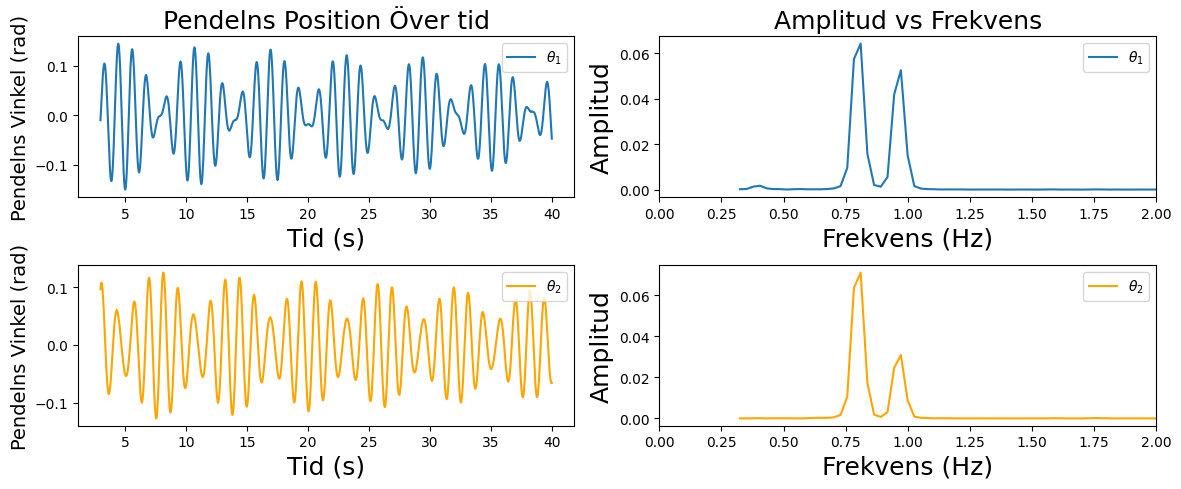

In [10]:
#m1 = 1013.5, m2=1492
plot_2_2("Kopplade_svängningar_olika_massor/KS_FJ3_m1000m1500.tsv",3, 40, 1.015, 380)

Dominerande frekvenser v1 [0.94569035 0.78357201]
Dominerande frekvenser v2 [0.94569035 0.78357201]
Dominerande amplituder [0.06568256 0.07752174]


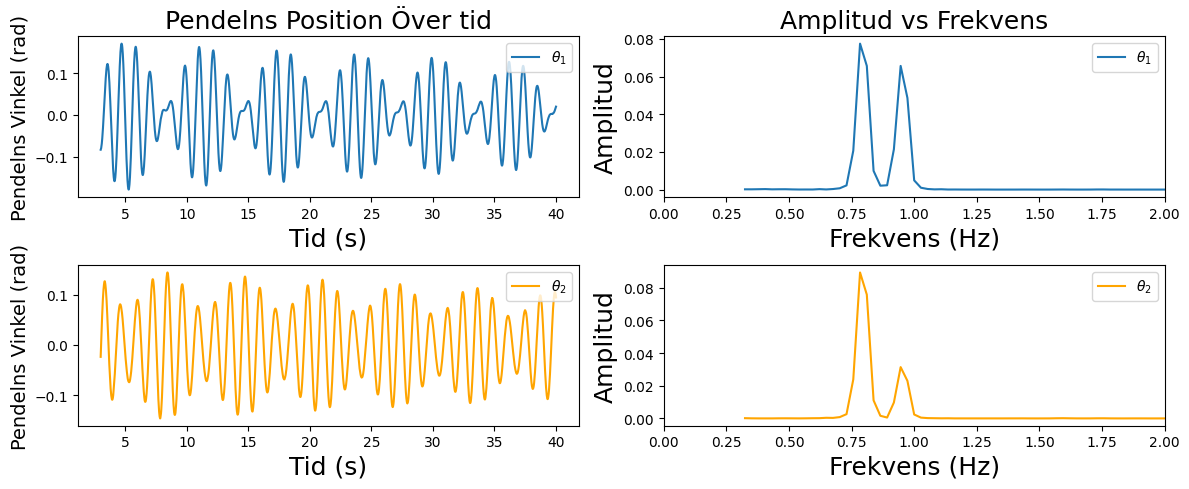

In [11]:
#m1 = 1013.5, m2=1705
plot_2_2("Kopplade_svängningar_olika_massor/KS_FJ3_m1000m1700.tsv",3, 40, 1.015, 380)

Dominerande frekvenser v1 [0.94569035 0.78357201]
Dominerande frekvenser v2 [0.94569035 0.78357201]
Dominerande amplituder [0.07237865 0.07483195]


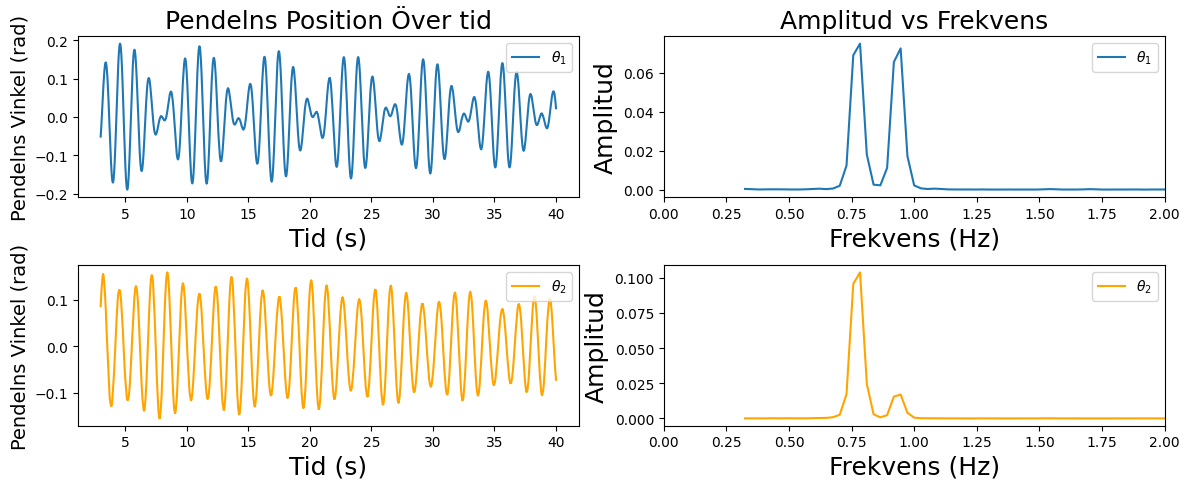

In [12]:
#m1 = 1013.5, m2=2516.1
plot_2_2("Kopplade_svängningar_olika_massor/KS_FJ3_m1000m2500_2.tsv",3, 40, 1.015, 380)